In [325]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

In [326]:
df=pd.read_csv('C:/Users/Acer/titan_train.csv')

In [327]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [328]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Dataset exploration

In [329]:
df.shape

(891, 12)

In [330]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [331]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [332]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [333]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [334]:
df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [335]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [336]:
df.shape

(891, 12)

In [337]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [338]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [339]:
df.groupby('Parch')['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [340]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [341]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


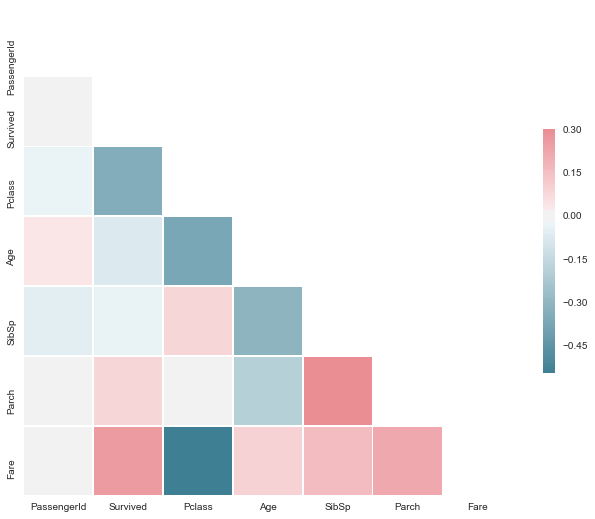

In [342]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [344]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [345]:
df.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [346]:
df.Pclass.isnull().value_counts()

False    891
Name: Pclass, dtype: int64

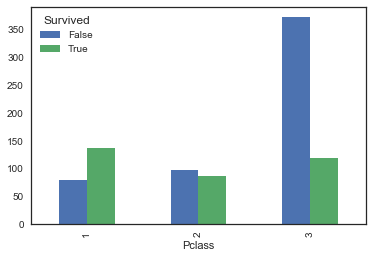

In [347]:
pd.crosstab(df['Pclass'],df['Survived'].astype(bool)).plot(kind='bar')
plt.show()

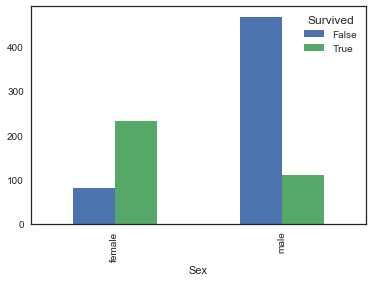

In [348]:
pd.crosstab(df['Sex'],df['Survived'].astype(bool)).plot(kind='bar')
plt.show()

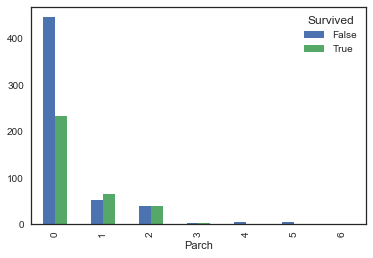

In [349]:
pd.crosstab(df['Parch'],df['Survived'].astype(bool)).plot(kind='bar')
plt.show()

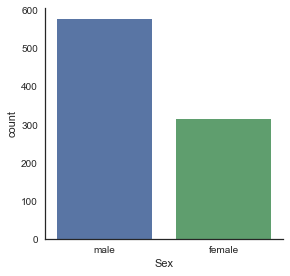

In [350]:
#Creating a factorplot, charting the number of male and female passengers
sns.factorplot('Sex',data=df,kind='count')
plt.show()

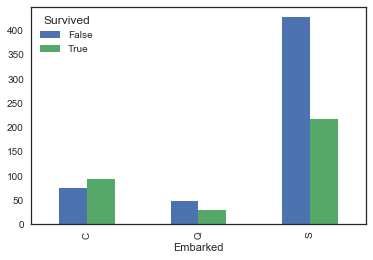

In [351]:
pd.crosstab(df['Embarked'],df['Survived'].astype(bool)).plot(kind='bar')
plt.show()


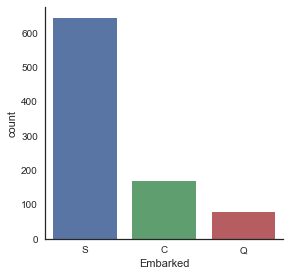

In [352]:
sns.factorplot('Embarked',data=df,kind='count')
plt.show()

In [353]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

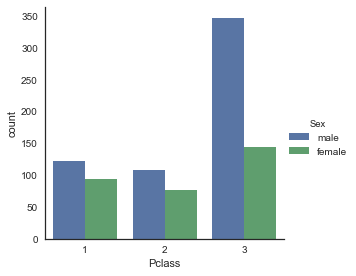

In [354]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')
plt.show()

In [355]:
#Function to detect if a person is a man, woman or child.
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
df['Person'] = df.apply(man_wom_chi,axis=1)

In [356]:
df.groupby('Person')['Survived'].value_counts()

Person  Survived
child   1            49
        0            34
female  1           205
        0            66
male    0           449
        1            88
Name: Survived, dtype: int64

In [357]:
df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

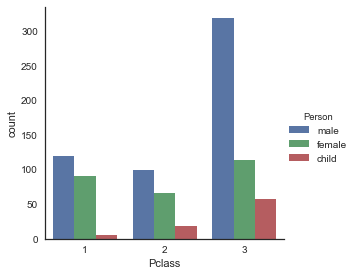

In [358]:
sns.factorplot('Pclass',data=df,hue='Person',kind='count')

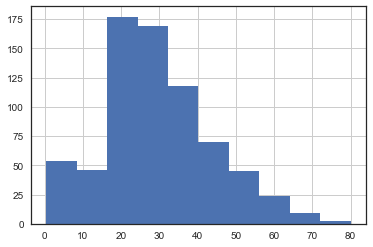

In [359]:
df.Age.hist(bins=10)

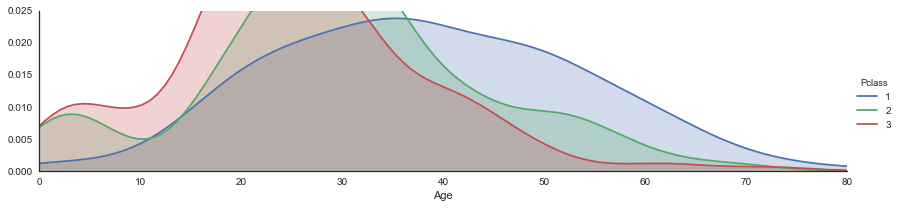

In [360]:
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [361]:
#Adding the number of family a passenger had onboard
df['Alone'] = df.SibSp + df.Parch

In [362]:
df['Alone'].loc[df['Alone']>0] = 'No'

df['Alone'].loc[df['Alone']==0] = 'Yes'

D:\data_science\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [363]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


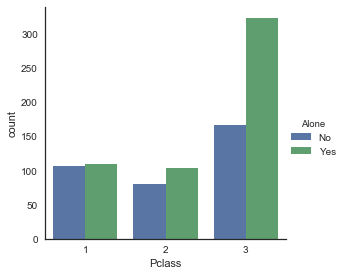

In [364]:
sns.factorplot('Pclass',data=df,hue='Alone',kind='count')

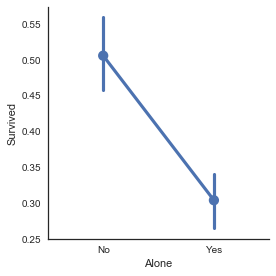

In [365]:
sns.factorplot('Alone','Survived',data=df)

In [366]:
df.groupby('Alone')['Survived'].value_counts()

Alone  Survived
No     1           179
       0           175
Yes    0           374
       1           163
Name: Survived, dtype: int64

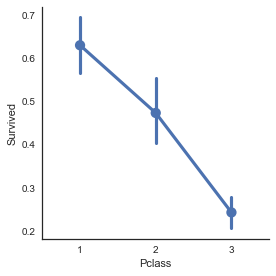

In [367]:
sns.factorplot('Pclass','Survived',data=df)

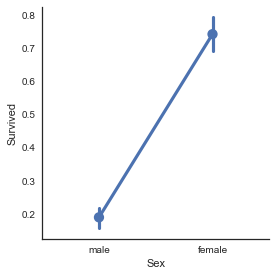

In [368]:
sns.factorplot('Sex','Survived',data=df)

In [369]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

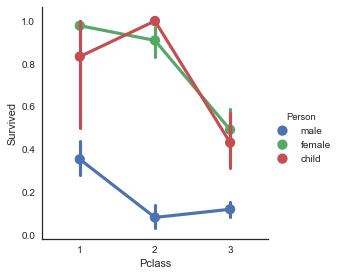

In [370]:
sns.factorplot('Pclass','Survived',hue='Person',data=df)

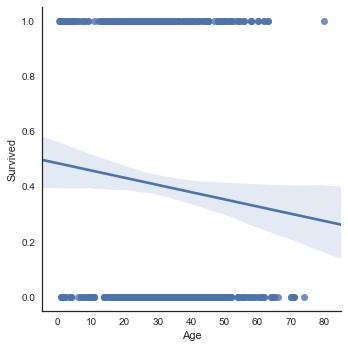

In [371]:
sns.lmplot('Age','Survived',data=df)

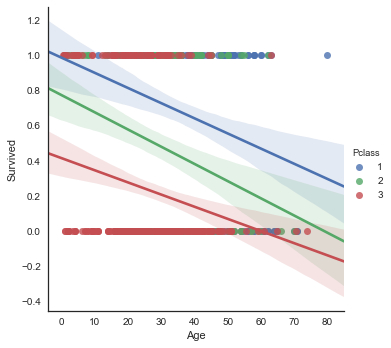

In [372]:
sns.lmplot('Age','Survived',hue='Pclass',data=df)

In [373]:
df.drop(['Name','Cabin','Age','Fare'],axis=1,inplace=True)

In [374]:
Y=df['Survived']

In [375]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [376]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Person,Alone
0,1,0,3,male,1,0,A/5 21171,S,male,No
1,2,1,1,female,1,0,PC 17599,C,female,No
2,3,1,3,female,0,0,STON/O2. 3101282,S,female,Yes
3,4,1,1,female,1,0,113803,S,female,No
4,5,0,3,male,0,0,373450,S,male,Yes


In [377]:
Pclass_dummies=pd.get_dummies(df.Pclass,prefix='Pclass').iloc[:,:]
df=pd.concat([df,Pclass_dummies],axis=1)

In [378]:
Person_dummies=pd.get_dummies(df.Person,prefix='Person').iloc[:,:]
df=pd.concat([df,Person_dummies],axis=1)

In [379]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Person,Alone,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male
0,1,0,3,male,1,0,A/5 21171,S,male,No,0,0,1,0,0,1
1,2,1,1,female,1,0,PC 17599,C,female,No,1,0,0,0,1,0
2,3,1,3,female,0,0,STON/O2. 3101282,S,female,Yes,0,0,1,0,1,0
3,4,1,1,female,1,0,113803,S,female,No,1,0,0,0,1,0
4,5,0,3,male,0,0,373450,S,male,Yes,0,0,1,0,0,1


In [380]:
Embarked_dummies=pd.get_dummies(df.Embarked,prefix='Embarked').iloc[:,:]
df=pd.concat([df,Embarked_dummies],axis=1)

In [381]:
Alone_dummies=pd.get_dummies(df.Alone,prefix='Alone').iloc[:,1:]
df=pd.concat([df,Alone_dummies],axis=1)

In [382]:
df.drop(['Ticket'],axis=1,inplace=True)

In [383]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Person,Alone,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Alone_Yes
0,1,0,3,male,1,0,S,male,No,0,0,1,0,0,1,0,0,1,0
1,2,1,1,female,1,0,C,female,No,1,0,0,0,1,0,1,0,0,0
2,3,1,3,female,0,0,S,female,Yes,0,0,1,0,1,0,0,0,1,1
3,4,1,1,female,1,0,S,female,No,1,0,0,0,1,0,0,0,1,0
4,5,0,3,male,0,0,S,male,Yes,0,0,1,0,0,1,0,0,1,1


In [384]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Person',
 'Alone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Person_child',
 'Person_female',
 'Person_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Alone_Yes']

In [385]:
df.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [386]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [387]:
SibSp_dummies=pd.get_dummies(df.SibSp,prefix='SibSp').iloc[:,:]
df=pd.concat([df,SibSp_dummies],axis=1)

In [388]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Person,Alone,Pclass_1,...,Embarked_Q,Embarked_S,Alone_Yes,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,1,0,3,male,1,0,S,male,No,0,...,0,1,0,0,1,0,0,0,0,0
1,2,1,1,female,1,0,C,female,No,1,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,female,0,0,S,female,Yes,0,...,0,1,1,1,0,0,0,0,0,0
3,4,1,1,female,1,0,S,female,No,1,...,0,1,0,0,1,0,0,0,0,0
4,5,0,3,male,0,0,S,male,Yes,0,...,0,1,1,1,0,0,0,0,0,0


In [389]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [390]:
Parch_dummies=pd.get_dummies(df.Parch,prefix='Parch').iloc[:,:]
df=pd.concat([df,Parch_dummies],axis=1)

In [391]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Person,Alone,Pclass_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,3,male,1,0,S,male,No,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,1,female,1,0,C,female,No,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,female,0,0,S,female,Yes,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,female,1,0,S,female,No,1,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,male,0,0,S,male,Yes,0,...,0,0,0,1,0,0,0,0,0,0


In [392]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Person',
 'Alone',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Person_child',
 'Person_female',
 'Person_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Alone_Yes',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6']

In [393]:
df.drop(['Pclass','SibSp','Parch','Embarked','Person','Alone'],axis=1,inplace=True)

In [394]:
df.head()

,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,male,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,female,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,1,female,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1,female,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,male,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [395]:
Sex_dummies=pd.get_dummies(df.Sex,prefix='Sex').iloc[:,1:]
df=pd.concat([df,Sex_dummies],axis=1)

In [396]:
df.head()

,PassengerId,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male
0,1,0,male,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,female,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3,1,female,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,female,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,male,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [397]:
df.drop(['Sex'],axis=1,inplace=True)

In [398]:
df.head()

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [399]:
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [400]:
df.head()

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_male
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,1,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,3,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [401]:
df.drop(['Survived'],axis=1,inplace=True)

In [402]:
df.columns.tolist()

['PassengerId',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Person_child',
 'Person_female',
 'Person_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Alone_Yes',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6',
 'Sex_male']

In [403]:
df.drop(['SibSp_3','SibSp_4','SibSp_5','SibSp_8','Parch_3','Parch_4','Parch_5','Parch_6'],axis=1,inplace=True)

In [404]:
X=df

In [405]:
# split data randomly into 70% training and 30% test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)

In [406]:
X.head()

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Alone_Yes,SibSp_0,SibSp_1,SibSp_2,Parch_0,Parch_1,Parch_2,Sex_male
0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1
1,2,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,3,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0
3,4,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
4,5,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1


In [407]:
dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [408]:
y_pred=dtree.predict(X_test)
import sklearn.metrics
from sklearn.metrics import accuracy_score

In [409]:
count_misclassified=(Y_test != y_pred)
print('Misclassified_samples:{}'.format(count_misclassified))
accuracy=metrics.accuracy_score(Y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Misclassified_samples:495    False
648    False
278     True
31     False
255    False
298     True
609    False
318    False
484     True
367    False
704    False
346    False
196    False
535    False
310    False
14     False
350    False
145    False
614    False
803    False
144    False
708    False
778    False
270    False
474    False
319    False
519    False
141     True
880    False
642    False
       ...  
272    False
154    False
832    False
820    False
382    False
20     False
585    False
65      True
680     True
878    False
304    False
823     True
521    False
333    False
698    False
481    False
71     False
49     False
573    False
338     True
261     True
116    False
76     False
48     False
843    False
263    False
718    False
620    False
786     True
64     False
Name: Survived, Length: 268, dtype: bool
Accuracy:0.81


In [410]:
Y_test.sum()

100

In [411]:
y_pred.sum()

71

In [412]:
100/268

0.373134328358209

In [413]:
import sklearn.metrics

In [414]:
sklearn.metrics.confusion_matrix(Y_test,y_pred)

array([[157,  11],
       [ 40,  60]])

In [416]:
scores=cross_val_score(estimator=dtree,
                      X=X,
                      y=Y,
                      scoring='accuracy',
                      cv=10)

print('accuracy per fold')
print(scores)
print('average_accuarcy:',scores.mean())

accuracy per fold
[ 0.82222222  0.81111111  0.7752809   0.84269663  0.85393258  0.7752809
  0.82022472  0.76404494  0.7752809   0.81818182]
average_accuarcy: 0.805825672455
